# Regresión Polinómica

**Contexto**  
Este conjunto de datos consiste en una lista de puestos en una empresa junto con los niveles y su salario asociado.

**Contenido**  
El conjunto de datos incluye columnas para el Puesto con valores que van desde Analista de negocios, Consultor junior hasta CEO, Nivel que varía de 1 a 10 y, finalmente, el Salario asociado con cada puesto que varía de **45,000 a 1,000,000**.

**Planteamiento del problema**  
El enunciado del problema es que el candidato con nivel 6.5 tenía un salario anterior de 160,000. Para contratar al candidato para un nuevo puesto, a la compañía le gustaría confirmar si está siendo honesto acerca de su último salario para que pueda tomar una decisión de contratación . Para hacer esto, haremos uso del método de Regresión Polinómicapara predecir el salario exacto del empleado.

In [1]:
# Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Cargar Datos

In [2]:
# Importar el data set
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
# Revisemos los datos
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
type(X)
type(y)

numpy.ndarray

In [5]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [7]:
# Ajustar la regresión lineal con el dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## EDA (Análisis Exploratorio de Datos)

Text(0.5, 0, 'Position')

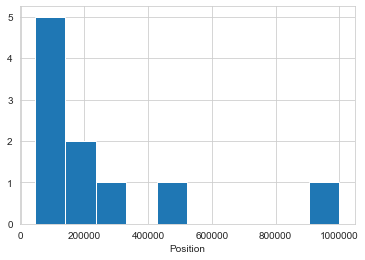

In [9]:
sns.set_style('whitegrid')
dataset['Salary'].hist()
plt.xlabel('Position')

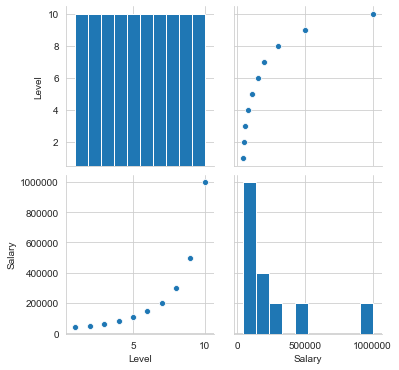

In [10]:
sns.pairplot(dataset,palette='Set1')

Text(0, 0.5, 'Frecuencia por posición')

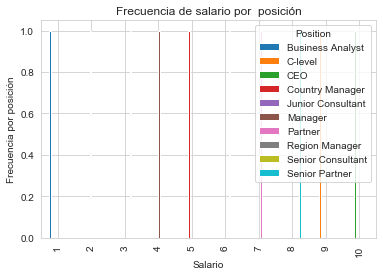

In [11]:
%matplotlib inline
pd.crosstab(dataset.Level, dataset.Position).plot(kind="bar")
plt.title("Frecuencia de salario por  posición")
plt.xlabel("Salario")
plt.ylabel("Frecuencia por posición")

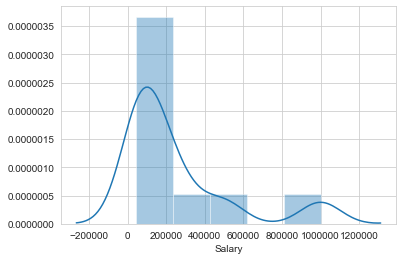

In [12]:
sns.distplot(dataset['Salary'])

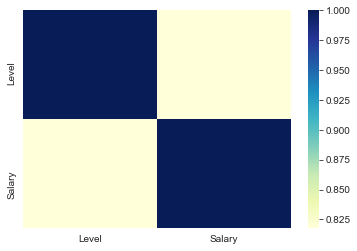

In [13]:
sns.heatmap(dataset.corr(),cmap="YlGnBu")

## Ajustar la regresión polinómica con el dataset

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualización de los resultados del Modelo Lineal

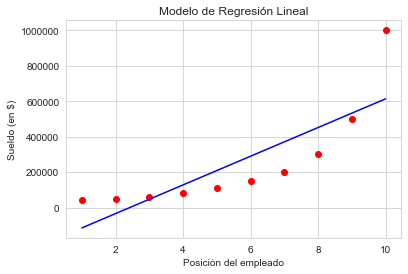

In [15]:
# Visualización de los resultados del Modelo Lineal
plt.scatter(X, y, color = "red")
plt.plot(X, lin_reg.predict(X), color = "blue")
plt.title("Modelo de Regresión Lineal")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

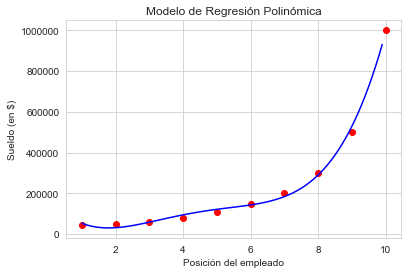

In [16]:
# Visualización de los resultados del Modelo Polinómico
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "blue")
plt.title("Modelo de Regresión Polinómica")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [17]:
# Predicción de nuestros modelos
# Se ha añadido la sintaxis de doble corchete necesaria para hacer la predicción en las últimas versiones de Python (3.7+)
print('Regresión Lineal:',lin_reg.predict([[6.5]]))
print('Regresión Polinomial:',lin_reg_2.predict(poly_reg.fit_transform([[6.5]])))

Regresión Lineal: [330378.78787879]
Regresión Polinomial: [158862.45265153]
